# Análise e Predição do Dataset California Housing - Regressão

## 1. Importação de bibliotecas


Inicia-se o processo de análise através da importação de bibliotecas importantes.

Bibliotecas para manipulação dos dados:

In [1]:
import pandas as pd
import numpy as np

Bibliotecas para análise dos dados:


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


Biblioteca para elaborar o modelo de predição

In [3]:
import sklearn

## 2. Importação dos dados

Para iniciar o processo de análise de dados, importaremos o dataset de treino disponibilizado.

In [4]:
df_train = pd.read_csv('../input/atividade-regressao-PMR3508/train.csv',index_col=['Id'],na_values = '?')

Agora, observaremos como estão dispostos os dados.


In [5]:
df_train.head(10)

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
Id,,,,,,,,,
15817,-120.85,37.57,27,819,157,451,150,34934,193800
6236,-117.74,34.06,48,2438,599,1508,548,28983,129200
19262,-118.11,33.92,32,1016,190,729,177,43000,151300
19743,-118.12,34.15,35,1760,447,984,384,34167,198200
7272,-120.63,37.41,27,2083,444,1462,479,26439,69100
1155,-121.43,38.54,42,3321,688,1346,658,24618,101300
19827,-122.28,37.53,25,3710,1015,2068,958,35445,286700
7801,-116.99,34.88,23,6060,1165,2920,1072,31528,69000
9867,-117.28,34.17,26,3106,603,1396,576,31736,122200


Para obter mais informações sobre as classes das features envolvidas, utilizaremos o comando `info()`

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 15817 to 9756
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   median_age          14448 non-null  int64  
 3   total_rooms         14448 non-null  int64  
 4   total_bedrooms      14448 non-null  int64  
 5   population          14448 non-null  int64  
 6   households          14448 non-null  int64  
 7   median_income       14448 non-null  int64  
 8   median_house_value  14448 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.1 MB


Observa-se que há apenas dados numéricos envolvidos no dataset.

## 3. Análise de Dados

Iniciaremos a análise dos dados a partir de descrições estátisticas dos valores para cada *feature*, para isso, utilizaremos o comando `describe´.

In [7]:
df_train.describe()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.563050,35.625804,28.700028,2622.627284,535.628391,1413.978405,496.934109,38747.577450,207556.603267
std,2.008096,2.138690,12.587508,2145.423570,416.800426,1095.060629,376.873380,19091.513037,116441.436255
min,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,4999.000000,14999.000000
25%,-121.790000,33.930000,18.000000,1444.000000,295.000000,784.000000,279.000000,25596.500000,119300.000000
50%,-118.490000,34.250000,29.000000,2116.000000,432.000000,1160.000000,407.000000,35334.000000,179950.000000
75%,-118.000000,37.710000,37.000000,3131.250000,645.250000,1705.000000,602.000000,47500.000000,266100.000000
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,150001.000000,500001.000000


Através das informações obtidas acimas, podemos notar que provavelmente não há outliers

### 3.1.1. Correlação

Nesta momento, analisaremos a correlação entre as features apresentadas pelo dataset e, assim, observar se todas elas possuem correlação com o problema estudado.

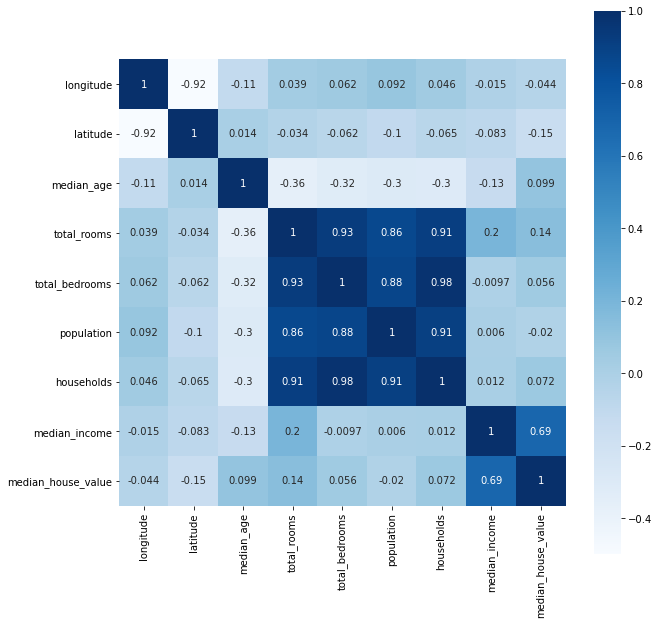

In [8]:
plt.figure(figsize=(10,10))

sns.heatmap(df_train.corr(), square = True, annot=True, vmin=-0.5, vmax=1, cmap='Blues')
plt.show()

Nota-se que a menores correlações estão relacionadas entre a latitude e longitude e a variável de saída median_house_value. 

Além disso, a feature que possui maior correlação com a variável de saída é a feature median_income, o que demostra grande poder decisivo na classificação dos dados


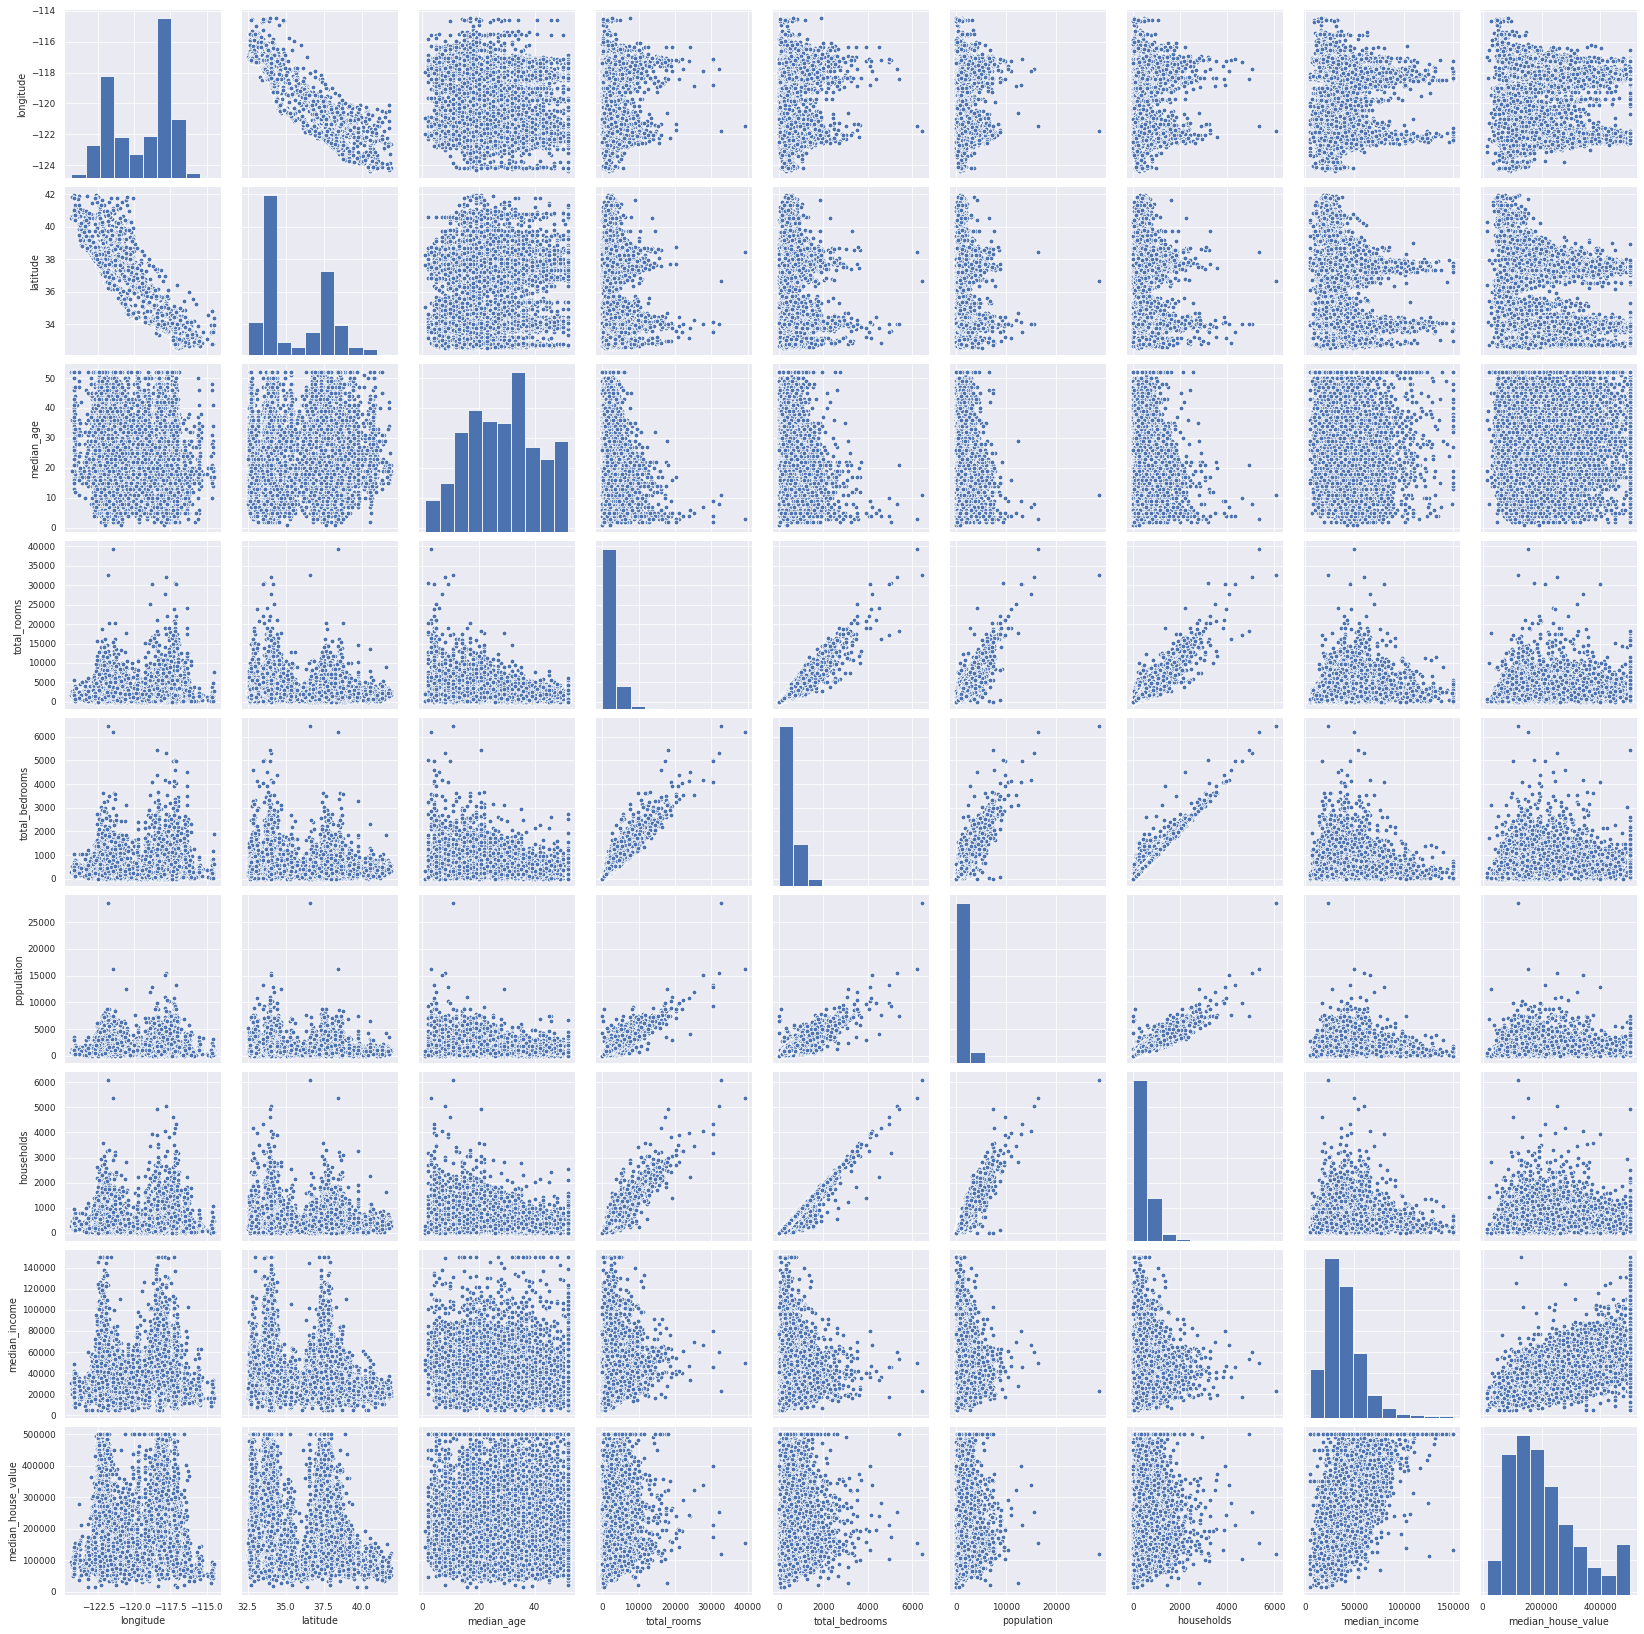

In [9]:
sns.set()
sns.set_context("paper")
sns.pairplot(df_train)

Observa-se com clareza a forma relativamente similar como as variáveis median_income e media_house_value se correlacionam com as outras features.

## 4. Pré-processamento dos Dados

Para iniciar o processo de processamento dos dados, precisamos, antes, realizar o pré-processamento.

### 4.1. Dados Duplicados

Como primeira medida, analisaremos se há dados duplicados no dataset.

In [10]:
df_train.count()

longitude             14448
latitude              14448
median_age            14448
total_rooms           14448
total_bedrooms        14448
population            14448
households            14448
median_income         14448
median_house_value    14448
dtype: int64

In [11]:
df_train.drop_duplicates(keep='first', inplace=True)

In [12]:
df_train.count()

longitude             14448
latitude              14448
median_age            14448
total_rooms           14448
total_bedrooms        14448
population            14448
households            14448
median_income         14448
median_house_value    14448
dtype: int64

Nesse caso, como não ouve descréscimo no número de dados, constata-se que não havia dados duplicados no dataset. Mesmo que tivesse, já teria sido removido.

### 4.2. Dados Faltantes

Outro passo importante no pré-processamento é lidar com os dados faltantes. Abaixo analisaremos se há missing data.

In [13]:
df_train.isnull().sum()

longitude             0
latitude              0
median_age            0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Para a nossa surpresa, não há qualquer dado faltante!

### 4.3. Normalização dos Dados

Iniciaremos o processo dividindo o dataset em features e label.

In [14]:
Y = df_train.pop('median_house_value').values.astype(float)

X = df_train

Em seguida, normalizaremos os dados, a fim de obter uma média igual e a 0 e uma variânicia igual a 1 ($µ=0$, $\sigma^2=1$)

In [15]:
from sklearn.preprocessing import StandardScaler

normalizer=StandardScaler()



In [16]:
X = normalizer.fit_transform(X)

In [17]:
df_train.head()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income
Id,,,,,,,,
15817,-120.85,37.57,27,819,157,451,150,34934
6236,-117.74,34.06,48,2438,599,1508,548,28983
19262,-118.11,33.92,32,1016,190,729,177,43000
19743,-118.12,34.15,35,1760,447,984,384,34167
7272,-120.63,37.41,27,2083,444,1462,479,26439


Analisando, novamente, os dados, é possível observar que os dados foram normalizados corretamente.

### 5. Predição 

### 5.1. KNN

Através de testes prévios, foi possível determinar que o classificador KNN Regressor obteve o melhor resultados, se comparado com o calssificador Liner Regression.

In [18]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import ShuffleSplit

knnr = KNeighborsRegressor(n_neighbors=8)

cv = ShuffleSplit(n_splits=12, test_size=0.2, random_state=42)

In [19]:

score = cross_val_score(knnr, X, Y, cv = cv, scoring="neg_mean_squared_log_error")
print("RMSLE:", ((-score)**0.5).mean())

RMSLE: 0.30094052318861025


In [20]:
knnr.fit(X,Y)

KNeighborsRegressor(n_neighbors=8)

## 5. Submissão

Por fim, carregaremos os dados de teste para validar o modelo contruido com base no dataset de treino.

In [21]:
df_test = pd.read_csv('../input/atividade-regressao-PMR3508/test.csv', index_col=['Id'])


In [22]:
df_test.head()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income
Id,,,,,,,,
8609,-118.67,34.30,5,6123,825,2440,736,79013
14610,-117.66,34.09,26,1151,200,593,188,36667
1557,-118.93,35.37,34,2412,446,1558,421,26903
12875,-117.23,34.14,16,2577,521,956,472,25625
17821,-121.06,38.98,14,2267,355,1140,369,47019


Normalizaremos, novamente, o dataset.

In [23]:
from sklearn.preprocessing import StandardScaler

normalizer=StandardScaler()


In [24]:
x_test = normalizer.fit_transform(df_test)

A partir do classificador e dos dados de teste, podemos predizer as variáveis de saída.

In [25]:
predictions = knnr.predict(x_test)

In [26]:
predictions

array([367575.   , 187250.   ,  59562.5  , ..., 193125.   , 225337.625,
        94000.   ])

### 5.1 Submissão ao Kaggle

In [27]:
submission = pd.DataFrame()

In [28]:
submission[0] = df_test.index
submission[1] = predictions
submission.columns = ['Id','median_house_value']

In [29]:
submission.to_csv('submission.csv',index = False)